<a href="https://colab.research.google.com/github/xrizer/tugas-programming-class/blob/master/Datamining_kelompok1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mengimport modul Python.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px



In [3]:
# Mengimport data csv, menghapus duplikasi data, dan menampilkan beberapa data teratas.
df = pd.read_excel('https://github.com/xrizer/tugas-programming-class/blob/master/Untitled%20spreadsheet%20(3).xlsx?raw=true')
df.drop_duplicates(inplace=True)
df.head()

,no,tgl_iklan,url,harga,kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
0,1,2021-03-31,https://www.rumah.com/listing-properti/dijual-...,682200000,Jakarta,44,52,3,2,0,0,1,0,2200.0,SHM,"Rumah murah strategis KPR All in, 2 lantai pre...",\nRumah Murah Dan Asri Dekat Pintu Tol Anti Ba...
1,2,2021-04-01,https://www.rumah.com/listing-properti/dijual-...,2100000000,Jakarta,162,200,4,2,1,1,0,1,3500.0,SHM,Dijual rumah bagus di Taman Modern cakung,Dijual Rumah Bagus Di Taman Modern Cakung Jaka...
2,3,2021-04-01,https://www.rumah.com/listing-properti/dijual-...,2900000000,Jakarta,102,200,4,2,1,1,1,1,3500.0,SHM,"Rumah di Janur Asri, Kelapa Gading","Rumah Di Janur Asri, Kelapa Gading\nDijual rum..."
3,4,2021-04-01,https://www.rumah.com/listing-properti/dijual-...,4900000000,Jakarta,149,225,4,3,1,0,2,1,2200.0,SHM,Harga Perdana Rumah 3 Lantai di The Heritage R...,Rumah Mewah 3 Lantai Harga Perdana\nLaunch NOW...
4,5,2021-04-01,https://www.rumah.com/listing-properti/dijual-...,2800000000,Jakarta,120,180,4,3,1,1,2,0,2200.0,SHM,Rumah Mewah Siap Huni Strategis Dekat Toll Jag...,10 Menit Menuju Toll Andara\nFDL 2187RJ\nDijua...


In [4]:
# Menghapus variabel no, tgl_iklan, url, judul, deskripsi, dan kota.
hapus = ['no','tgl_iklan','url','judul','deskripsi','kota']
df.drop(hapus,axis=1,inplace=True)

In [5]:
#cek missing values
df.isna().any()

harga      False
LT         False
LB         False
KT         False
KM         False
KTP        False
KMP        False
carport    False
garasi     False
listrik     True
surat      False
dtype: bool

Ternyata pada kolom listrik ada missing values

In [6]:
#imputasi missing values kolom listrik menggunakan sklearn simple imputer dengan metode rata-rata
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df[['listrik']])
df['listrik'] = imr.transform(df[['listrik']]).ravel()

In [7]:
#cek kolom listrik setelah imputasi
df['listrik'].isnull().any()

False

In [8]:
# cek statistik deskriptif tentang data
df.describe()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
count,1.000000e+02,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.419133e+09,211.92000,247.650000,3.830000,3.07000,0.350000,0.230000,1.710000,0.370000,4355.208333
std,1.169831e+10,235.71446,276.040634,1.414606,1.69524,0.592461,0.422953,1.659348,0.580056,6765.015021
min,1.400000e+08,20.00000,35.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1300.000000
25%,1.200000e+09,90.00000,90.000000,3.000000,2.00000,0.000000,0.000000,1.000000,0.000000,2200.000000
50%,2.275000e+09,135.00000,170.000000,4.000000,3.00000,0.000000,0.000000,1.000000,0.000000,2200.000000
75%,4.575000e+09,238.50000,283.500000,4.250000,4.00000,1.000000,0.000000,2.000000,1.000000,4366.406250
max,9.600000e+10,1500.00000,2000.000000,10.000000,10.00000,3.000000,1.000000,9.000000,3.000000,66000.000000


In [9]:
# Menampilkan data teratas (head) setelah beberapa variabel (no, tgl_iklan, url, judul, deskripsi, kota) dihapus,dan kolom listrik di imputasi
df.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,682200000,44,52,3,2,0,0,1,0,2200.0,SHM
1,2100000000,162,200,4,2,1,1,0,1,3500.0,SHM
2,2900000000,102,200,4,2,1,1,1,1,3500.0,SHM
3,4900000000,149,225,4,3,1,0,2,1,2200.0,SHM
4,2800000000,120,180,4,3,1,1,2,0,2200.0,SHM


In [10]:
# Memilih variabel dengan tipe data float64 dan int64 menggunakan variabel baru (df_num), kemudian ditampilkan beberapa data teratasnya.
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,682200000,44,52,3,2,0,0,1,0,2200.0
1,2100000000,162,200,4,2,1,1,0,1,3500.0
2,2900000000,102,200,4,2,1,1,1,1,3500.0
3,4900000000,149,225,4,3,1,0,2,1,2200.0
4,2800000000,120,180,4,3,1,1,2,0,2200.0


In [11]:
# Memilih variabel dengan tipe data category menggunakan variabel baru (df_cat), kemudian ditampilkan beberapa data teratasnya.
df_cat = df.select_dtypes(include = ['category'])
df_cat.head()

""
0
1
2
3
4


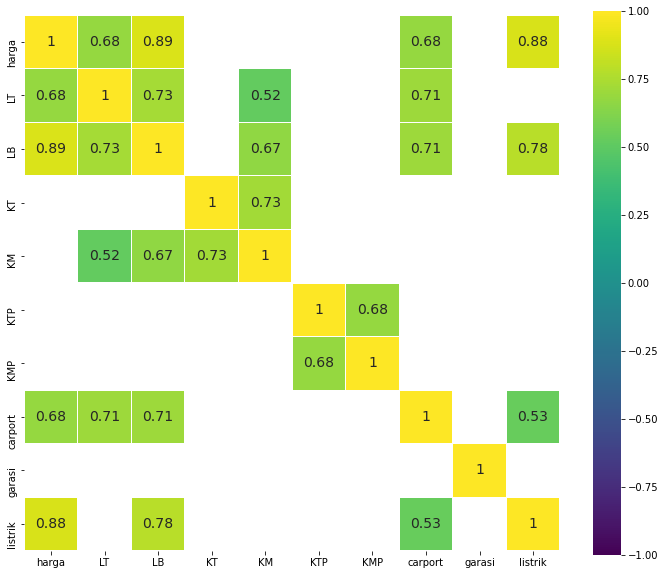

In [12]:
# Mengimport library seaborn.
# Data divisualisasikan menggunakan heatmap untuk menganalisa korelasi antar variabel.
import seaborn as sns
corr = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);


Berdasarkan korelasi antar variabel yang divisualisasikan oleh heatmap, terlihat bahwa variabel harga memiliki korelasi yang cukup kuat dengan daya listrik (0.88) dan luas bangunan (0.89). Selain itu, terlihat juga korelasi yang cukup kuat antara luas bangunan dengan daya listrik (0.79). Artinya luas bangunan suatu rumah memengaruhi harga jual dan daya listrik yang diperlukan.





In [13]:
# Memastikan tipe data surat adalah kategorik.
df['surat'] = df['surat'].astype('category')
df.dtypes

harga         int64
LT            int64
LB            int64
KT            int64
KM            int64
KTP           int64
KMP           int64
carport       int64
garasi        int64
listrik     float64
surat      category
dtype: object

In [14]:
# Memeriksa outlier menggunakan boxplot dalam skala harga (Billion = milyar rupiah)
import plotly.express as px

fig = px.box(df, x="surat", y="harga",title='Tabel Outlier Harga Rumah (milyar) berdasarkan jenis Surat',labels={
                     "harga": "Harga Rumah(milyar)",
                     "surat": "Jenis Sertifikat Rumah",
                 })
fig.show()


Boxplot digunakan untuk mengecek persebaran data,dapat dilihat bahwa pada rumah yang bersertifikat SHM memiliki outlier dengan harga rumah yang lebih dari 15 milyar hingga  mencapai 96 milyar rupiah

In [15]:
# Memeriksa outliers pada data menggunakan IQR(Inter Quartile range). dan memisahkanya
from numpy import quantile
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

no_outliers = df_num[(Q1 - 1.5*IQR < df_num) &  (df_num < Q3 + 1.5*IQR)]
outliers = df_num[(Q1 - 1.5*IQR >= df_num) |  (df_num >= Q3 + 1.5*IQR)]
no_outliers.drop('KMP',axis=1,inplace=True)
outliers.drop('KMP',axis=1,inplace=True)
outliers


,harga,LT,LB,KT,KM,KTP,carport,garasi,listrik
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
96,NaN,1080.0,600.0,NaN,NaN,NaN,4.0,NaN,NaN
97,2.800000e+10,500.0,1000.0,NaN,NaN,NaN,NaN,3.0,16500.0
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
outliers['harga'].max()

96000000000.0

In [17]:
outliers['listrik'].max()

66000.0

In [18]:
outliers['LB'].max()

2000.0

In [19]:
outliers['LT'].max()

1500.0

Terlihat bahwa terdapat outliers pada beberapa variabel data, mayoritas terdapat pada variabel harga, luas tanah, luas bangunan, dan daya listrik.

In [20]:
# Menampilkan data tanpa outliers.
no_outliers.dropna(inplace=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(no_outliers)

           harga     LT     LB   KT   KM  KTP  carport  garasi      listrik
0   6.822000e+08   44.0   52.0  3.0  2.0  0.0      1.0     0.0  2200.000000
1   2.100000e+09  162.0  200.0  4.0  2.0  1.0      0.0     1.0  3500.000000
2   2.900000e+09  102.0  200.0  4.0  2.0  1.0      1.0     1.0  3500.000000
3   4.900000e+09  149.0  225.0  4.0  3.0  1.0      2.0     1.0  2200.000000
4   2.800000e+09  120.0  180.0  4.0  3.0  1.0      2.0     0.0  2200.000000
5   5.900000e+09  240.0  360.0  5.0  4.0  2.0      1.0     1.0  6600.000000
6   3.700000e+09  130.0  225.0  4.0  2.0  0.0      2.0     1.0  2200.000000
7   1.200000e+09   91.0  135.0  3.0  3.0  0.0      1.0     1.0  2200.000000
8   3.200000e+09  135.0  215.0  4.0  4.0  0.0      1.0     1.0  3500.000000
9   2.500000e+09  178.0   90.0  4.0  4.0  0.0      1.0     1.0  2200.000000
10  3.400000e+09  120.0  160.0  5.0  4.0  0.0      1.0     1.0  2200.000000
12  2.200000e+09  114.0  105.0  4.0  3.0  0.0      1.0     0.0  4400.000000
13  6.420000

In [21]:
no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 99
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   harga    78 non-null     float64
 1   LT       78 non-null     float64
 2   LB       78 non-null     float64
 3   KT       78 non-null     float64
 4   KM       78 non-null     float64
 5   KTP      78 non-null     float64
 6   carport  78 non-null     float64
 7   garasi   78 non-null     float64
 8   listrik  78 non-null     float64
dtypes: float64(9)
memory usage: 6.1 KB


In [22]:
no_outliers.describe()

,harga,LT,LB,KT,KM,KTP,carport,garasi,listrik
count,7.800000e+01,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,2.475170e+09,132.615385,154.769231,3.435897,2.500000,0.269231,1.243590,0.269231,2864.369658
std,1.846852e+09,77.615140,94.488771,0.961462,1.148121,0.474631,0.776036,0.474631,1165.251784
min,1.400000e+08,20.000000,35.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
25%,1.200000e+09,84.000000,86.500000,3.000000,2.000000,0.000000,1.000000,0.000000,2200.000000
50%,2.050000e+09,120.000000,140.000000,3.000000,2.000000,0.000000,1.000000,0.000000,2200.000000
75%,3.475000e+09,160.000000,207.500000,4.000000,3.000000,0.750000,2.000000,0.750000,3500.000000
max,9.500000e+09,378.000000,500.000000,6.000000,5.000000,2.000000,3.000000,2.000000,6600.000000


In [23]:
fig = px.scatter(df,x='LB', y='harga',labels={
                     "harga": "harga rumah(milyar)",
                     "LB": "Luas Bangunan(meter persegi)",
                 },
                title="Tabel Hubungan Harga rumah dengan Luas Bangunanya(masih ada outlier)")
fig.show()

In [24]:
fig = px.scatter(no_outliers,x='LB', y='harga',labels={
                     "harga": "harga rumah(milyar)",
                     "LB": "Luas Bangunan(meter persegi)",
                 },
                title="Tabel Hubungan Harga rumah dengan Luas Bangunanya setelah pemisahan outlier")
fig.show()

In [25]:
fig = px.scatter(df,x='harga', y='listrik',labels={
                     "harga": "harga rumah(milyar)",
                     "LB": "Luas Bangunan(meter persegi)",
                 },
                title="Tabel Hubungan Harga rumah dengan voltase listrik yg digunakan")
fig.show()

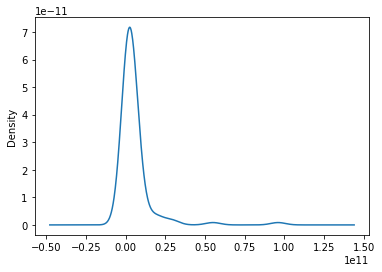

In [26]:
#cek density kolom 
df['harga'].plot.kde()